In [61]:
%matplotlib inline  
# !pip install matplotlib

import pandas as pd
import pandas_highcharts.core
import numpy as np
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot 

from datetime import date

import os


os.environ.setdefault("DJANGO_SETTINGS_MODULE", "IMAM.settings")

from django.conf import settings
from home.management.commands.load_data import rename_cols, assign_state_lga_num

import django
django.setup()

from home.models import Site

In [62]:
engine = create_engine(
    'postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{NAME}'.format(**settings.DATABASES['default']))
df = pd.read_sql_query("select * from program;", con=engine)

In [63]:
df.weeknum.unique()

array([u'42', u'26', u'23', u'22', u'24', u'25', u'27', u'28', u'29',
       u'30', u'31', u'32', u'33', u'34', u'35', u'36', u'37', u'38',
       u'39', u'40', u'41', u'43', u'44', u'45', u'46', u'47', u'48',
       u'49', u'50', u'51', u'52', u'1', u'2', u'3', u'4', u'5', u'6',
       u'Pro', u'PRO', u'53', u'54', u'14', u'P', u'Reg', u'Y', u'18',
       u'11', u'21', u'20', u'19', u'7', u'82', u'Same', u'REGISTRATION',
       u'70', u'15', u'10',
       u'No peament for rapid pro treaning no report.',
       u'You have send SMS training  allaunces to anyone except me', u'N',
       u'No', u'.32', u'197',
       u'You a not sending data with pay for the traning',
       u'I WILL NOT SEND REPORT UNTILL OUR TRENING MONEY HAS PAID', u'Pso',
       u'222', u'56', u'1.5', u'9', u'YES', u'0', u'Week', u'215', u'Yes',
       u'SaAM', u'NO', u'STO', u'Death', u'S', u'8', u'Sto', u'WEEK49',
       None, u'252', u'N ', u'PRO   ', u'Valid', u'y',
       u'Why charging my report', u'.31', u'84',

In [64]:
# Convert to int
df['amar'] = pd.to_numeric(df.amar, errors='coerce')
df['weeknum'] = pd.to_numeric(df.weeknum, errors='coerce')

In [65]:
# df_filtered
# remove crap data
df_filtered = df.query('weeknum==weeknum').query('0.99<weeknum<53')

In [66]:
df_filtered.weeknum.unique()
# remove decimals points

array([ 42. ,  26. ,  23. ,  22. ,  24. ,  25. ,  27. ,  28. ,  29. ,
        30. ,  31. ,  32. ,  33. ,  34. ,  35. ,  36. ,  37. ,  38. ,
        39. ,  40. ,  41. ,  43. ,  44. ,  45. ,  46. ,  47. ,  48. ,
        49. ,  50. ,  51. ,  52. ,   1. ,   2. ,   3. ,   4. ,   5. ,
         6. ,  14. ,  18. ,  11. ,  21. ,  20. ,  19. ,   7. ,  15. ,
        10. ,   1.5,   9. ,   8. ,  16. ,  12. ,  13. ,   5.1,  52.1,  17. ])

In [67]:
df_filtered['weeknum'] = df_filtered.weeknum.astype('int')

In [68]:
df_filtered.weeknum.unique()

array([42, 26, 23, 22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,  1,  2,  3,
        4,  5,  6, 14, 18, 11, 21, 20, 19,  7, 15, 10,  9,  8, 16, 12, 13,
       17])

In [69]:
df_filtered["amar"]

0         NaN
1         NaN
2        10.0
3         8.0
4        13.0
5         8.0
6        14.0
7        13.0
8        13.0
9        17.0
10        8.0
11       14.0
12       13.0
13       17.0
14        6.0
15       14.0
16       14.0
17       14.0
18       20.0
19       10.0
20       15.0
21        NaN
22       22.0
23       27.0
24       20.0
25       22.0
26       27.0
27       20.0
28       22.0
29       14.0
         ... 
31285     5.0
31286     6.0
31287     5.0
31288    10.0
31289     4.0
31290     8.0
31291    17.0
31292     2.0
31293    10.0
31294     7.0
31295    11.0
31296     0.0
31297     2.0
31298     7.0
31299     5.0
31300     3.0
31301     NaN
31302     7.0
31303     7.0
31304    10.0
31305     6.0
31306     5.0
31307    68.0
31308    15.0
31309     5.0
31310     5.0
31311    19.0
31312    15.0
31313    12.0
31314    12.0
Name: amar, dtype: float64

In [70]:
# with non id variables - set NaN to zero

# df_filtered["amar"] = df_filtered["amar"].fillna((0), inplace=True)
# sets everything to none

# df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True)
#  df_filtered["amar"].fillna((0), inplace=True)

df_filtered["amar"]

0         NaN
1         NaN
2        10.0
3         8.0
4        13.0
5         8.0
6        14.0
7        13.0
8        13.0
9        17.0
10        8.0
11       14.0
12       13.0
13       17.0
14        6.0
15       14.0
16       14.0
17       14.0
18       20.0
19       10.0
20       15.0
21        NaN
22       22.0
23       27.0
24       20.0
25       22.0
26       27.0
27       20.0
28       22.0
29       14.0
         ... 
31285     5.0
31286     6.0
31287     5.0
31288    10.0
31289     4.0
31290     8.0
31291    17.0
31292     2.0
31293    10.0
31294     7.0
31295    11.0
31296     0.0
31297     2.0
31298     7.0
31299     5.0
31300     3.0
31301     NaN
31302     7.0
31303     7.0
31304    10.0
31305     6.0
31306     5.0
31307    68.0
31308    15.0
31309     5.0
31310     5.0
31311    19.0
31312    15.0
31313    12.0
31314    12.0
Name: amar, dtype: float64

In [71]:
#df_filtered['amar'] = df_filtered.amar.astype('int')
# cannot cast variable with NaN to int

# df_filtered.sort_values(by='amar')


In [72]:
import math
print type(df_filtered['amar'])
# TypeError: cannot convert the series to <type 'float'>
# df_filtered['amar'] = math.floor(df_filtered['amar'])

<class 'pandas.core.series.Series'>


In [73]:
df_filtered.amar.unique()

array([             nan,   1.00000000e+01,   8.00000000e+00,
         1.30000000e+01,   1.40000000e+01,   1.70000000e+01,
         6.00000000e+00,   2.00000000e+01,   1.50000000e+01,
         2.20000000e+01,   2.70000000e+01,   0.00000000e+00,
         2.10000000e+01,   2.40000000e+01,   2.30000000e+01,
         1.80000000e+01,   5.00000000e+00,   7.00000000e+00,
         1.60000000e+01,   3.20000000e+01,   3.60000000e+01,
         1.01000000e+02,   9.00000000e+00,   1.90000000e+01,
         3.30000000e+01,   8.80000000e+01,   1.20000000e+01,
         4.00000000e+00,   1.10000000e+01,   2.80000000e+01,
         2.50000000e+01,   2.08000000e+02,   7.90000000e+01,
         3.70000000e+01,   2.00000000e+00,   1.00000000e+00,
         3.00000000e+00,   6.00000000e+01,   2.60000000e+01,
         4.80000000e+01,   1.18000000e+02,   3.45000000e+02,
         3.23000000e+02,   3.10000000e+01,   4.70000000e+01,
         1.13000000e+02,   4.60000000e+01,   1.08000000e+02,
         5.90000000e+01,

In [74]:
df_filtered = assign_state_lga_num(df_filtered)
adm_by_week = df_filtered['amar'].groupby(df_filtered['weeknum']).sum()

print type (adm_by_week)
print adm_by_week


<class 'pandas.core.series.Series'>
weeknum
1     13553.14
2      9550.12
3      9123.00
4      8981.00
5      6784.00
6      4780.00
7       191.00
8       115.00
9       160.00
10      234.00
11       66.00
12        4.00
13       25.00
14      103.00
15       10.00
16       64.00
17         NaN
18      362.00
19        9.00
20       32.00
21       18.00
22     1754.00
23     2121.00
24     1840.00
25     1663.00
26     2075.00
27     3676.00
28     5145.00
29     4657.00
30     4633.00
31    12803.00
32    10547.17
33    15004.00
34     9599.10
35    11392.00
36    19455.00
37    12216.00
38    24700.00
39    22140.00
40    19912.12
41    22253.00
42    19093.00
43    19037.00
44    21710.17
45    25103.00
46    21048.00
47    16145.00
48    14561.00
49    17445.00
50    15500.00
51    13284.00
52    12868.15
Name: amar, dtype: float64


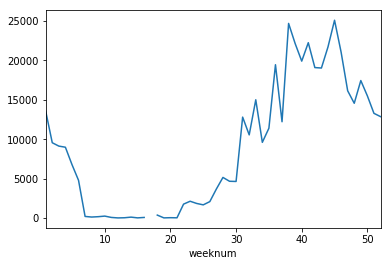

In [75]:
adm_by_week.plot()

In [76]:
# data cleaning on state num
df_filtered['state_num'] = pd.to_numeric(df_filtered.state_num, errors='coerce')
df_filtered = df_filtered.query('state_num==state_num').query('0<state_num<37')
df_filtered['state_num'] = df_filtered.state_num.astype('int')
df_filtered.state_num.unique()

array([ 4, 33, 35,  1, 36, 16,  5, 17, 18,  8,  2, 21, 20, 22, 19,  3])

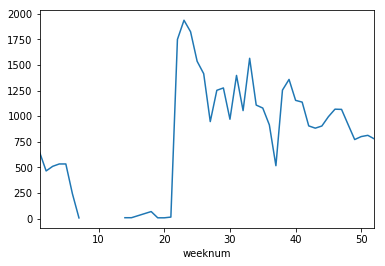

In [77]:
adm_by_week = df_filtered.query('state_num==33')['amar'].groupby(df_filtered['weeknum']).sum()

adm_by_week.plot()

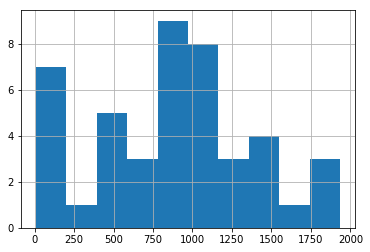

In [78]:
adm_by_week.hist()

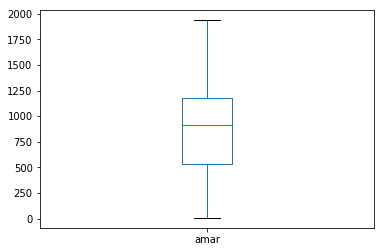

In [79]:
adm_by_week.plot(kind="box")

In [80]:
# No longer using pandas_highcharts
# chart = pandas_highcharts.core.serialize(adm_by_week.to_frame(), render_to='my-chart',output_type='json')
# chart

In [81]:
"12".isdigit()

True

In [82]:
"something".isdigit()

False

In [83]:
type(df_filtered)


pandas.core.frame.DataFrame

In [84]:
type(df_filtered['amar'])


pandas.core.series.Series

In [85]:
# Assign state and LGA numbers to data frame
df = assign_state_lga_num(df)


In [86]:
# Convert to float
df['amar'] = pd.to_numeric(df.amar, errors='coerce')
df['weeknum'] = pd.to_numeric(df.weeknum, errors='coerce')
df['state_num'] = pd.to_numeric(df.state_num, errors='coerce')
df['lga_num'] = pd.to_numeric(df.lga_num, errors='coerce')

In [87]:
# Clean out of range data
df_filtered = df.query('weeknum==weeknum').query('0<weeknum<53')
df_filtered = df_filtered.query('amar==amar').query('0<amar<99999')
df_filtered = df_filtered.query('state_num==state_num').query('0<state_num<37')
df_filtered = df_filtered.query('lga_num==lga_num').query('101<lga_num<3799')

In [88]:
# Set to int - so that decimal points are not presented
df_filtered['weeknum'] = df_filtered.weeknum.astype('int')
df_filtered['amar'] = df_filtered.amar.astype('int')
df_filtered['state_num'] = df_filtered.state_num.astype('int')
df_filtered['lga_num'] = df_filtered.lga_num.astype('int')

In [89]:
adm_by_week = df_filtered.query('lga_num==201')['amar'].groupby(df_filtered['weeknum']).sum()


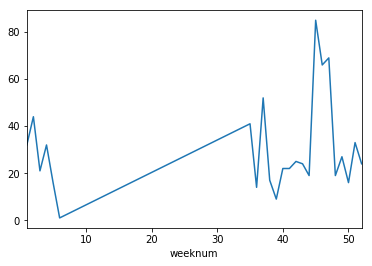

In [90]:
adm_by_week.plot()

In [92]:
# length of list of all indices of adm_by_week
print len(list(adm_by_week))
print len(adm_by_week)
adm_by_week.index

TypeError: 'tuple' object is not callable

In [ ]:
list(zip(adm_by_week.index, adm_by_week.values.tolist()))

In [93]:
# Data cleaning

In [94]:
dataframe = df_filtered
list = ('amar', 'weeknum', 'state_num', 'lga_num', 'siteid', 'dcur', 'dead', 'defu', 'dmed', 'tout')


In [95]:
def convert_to_float(dataframe, list):
    # edit the data in pandas

    for l in list:
        dataframe[l] = pd.to_numeric(dataframe[l], errors='coerce')

#     df['amar'] = pd.to_numeric(df.amar, errors='coerce')
#     df['weeknum'] = pd.to_numeric(df.weeknum, errors='coerce')
#     df['state_num'] = pd.to_numeric(df.state_num, errors='coerce')
#     df['lga_num'] = pd.to_numeric(df.lga_num, errors='coerce')
#     df['siteid'] = pd.to_numeric(df.siteid, errors='coerce')

    return dataframe

In [96]:
for l in list:
    print dataframe[l]

2        10
3         8
4        13
5         8
6        14
7        13
8        13
9        17
10        8
11       14
12       13
13       17
14        6
15       14
16       14
17       14
18       20
19       10
20       15
22       22
23       27
24       20
25       22
26       27
27       20
28       22
29       14
30       14
33       21
34       22
         ..
31283     4
31284     3
31285     5
31286     6
31287     5
31288    10
31289     4
31290     8
31291    17
31292     2
31293    10
31294     7
31295    11
31297     2
31298     7
31299     5
31300     3
31302     7
31303     7
31304    10
31305     6
31306     5
31307    68
31308    15
31309     5
31310     5
31311    19
31312    15
31313    12
31314    12
Name: amar, dtype: int64
2        26
3        23
4        22
5        23
6        24
7        25
8        25
9        26
10       23
11       24
12       25
13       26
14       27
15       28
16       28
17       28
18       29
19       30
20       31
22       32
23 

In [97]:
# Set data points to NaN
# import numpy as np
# df_filtered.tout = df_filtered.tout.replace(np.NaN,0)
# df_filtered.tout = df_filtered.tout.replace(None,0)

# # Replace none with NaN
# DataFrame.fillna(value=np.nan, inplace=True)
# # Replace NaN with zero
# df = df.fillna(0)


In [98]:
# Does fillna replace None ?
df['dmed'] = df['dmed'].fillna(0)
print df['dmed']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         2
10        0
11        0
12        0
13        2
14        0
15        0
16        0
17        0
18        0
19        0
20        1
21        0
22        0
23        1
24        1
25        0
26        1
27        1
28        0
29        0
         ..
31285     0
31286     0
31287     0
31288     0
31289     0
31290     0
31291     0
31292     0
31293     0
31294     0
31295     0
31296     0
31297     0
31298     0
31299     0
31300     5
31301     0
31302     3
31303     1
31304    11
31305    17
31306    18
31307    41
31308    41
31309     0
31310     0
31311     0
31312     1
31313     2
31314     0
Name: dmed, dtype: object


In [99]:
# create dataframe with NaN
df = pd.DataFrame(np.nan, index=[0,1,2,3], columns=['A'])
df

,A
0,NaN
1,NaN
2,NaN
3,NaN


In [100]:
# convert those NaN into zeros
df['A'] = df['A'].fillna(0)
df

,A
0,0.0
1,0.0
2,0.0
3,0.0


In [101]:
df = pd.DataFrame(None, index=[0,1,2,3], columns=['A'])
df

,A
0,NaN
1,NaN
2,NaN
3,NaN


In [102]:
data = [{'1': None},
         {'2': None},
         {'3': None}]
df = pd.DataFrame(data)
df

,1,2,3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN


In [103]:
# Total Discharges
df_filtered['total_discharges'] = df_filtered.dcur + df_filtered.dead + df_filtered.defu + df_filtered.dmed

# Total Exits - Cout (Mike Golden term)
df_filtered['total_exits'] = df_filtered.total_discharges + df_filtered.tout

In [104]:
# Print columns
columnsTitles = ['dcur', 'dead', 'defu', 'dmed', 'tout','total_discharges', 'total_exits']

df2 = df_filtered.reindex(columns=columnsTitles)
print df2

       dcur  dead  defu  dmed  tout total_discharges total_exits
2        12     0     1     0     0            12010      120100
3        10     0     0     0     0            10000      100000
4        15     0     1     0     0            15010      150100
5        10     0     0     0     0            10000      100000
6         2     0     1     0     0             2010       20100
7         0     0     0     0     0             0000       00000
8        24     0     0     0     0            24000      240000
9         8     0     0     2     0             8002       80020
10       10     0     0     0     0            10000      100000
11        2     0     1     0     0             2010       20100
12       24     0     0     0     0            24000      240000
13        8     0     2     2     0             8022       80220
14       18     0     0     0     0            18000      180000
15        0  None  None  None  None              NaN         NaN
16        5     0     0  

In [105]:
# df_filtered.head()

In [106]:
# Recast to int
def cast_to_int(dataframe, list):
    for l in list:
        dataframe[l] = dataframe[l].astype('int')
        # Remove all instances of NaN
        dataframe[l] = dataframe[l].where((pd.notnull(df)), 0)
    return dataframe

In [107]:
for l in list:
    print dataframe[l].head()

2    10
3     8
4    13
5     8
6    14
Name: amar, dtype: int64
2    26
3    23
4    22
5    23
6    24
Name: weeknum, dtype: int64
2    33
3    33
4    33
5    33
6    33
Name: state_num, dtype: int64
2    3313
3    3308
4    3308
5    3308
6    3308
Name: lga_num, dtype: int64
2          3313
3    3308110010
4    3308110010
5    3308110010
6    3308110010
Name: siteid, dtype: object
2    12
3    10
4    15
5    10
6     2
Name: dcur, dtype: object
2    0
3    0
4    0
5    0
6    0
Name: dead, dtype: object
2    1
3    0
4    1
5    0
6    1
Name: defu, dtype: object
2    0
3    0
4    0
5    0
6    0
Name: dmed, dtype: object
2    0
3    0
4    0
5    0
6    0
Name: tout, dtype: object


In [108]:
import numpy as np
df_filtered['dmed'] = np.where((df_filtered['dmed']<11),99,df_filtered['dmed'])
# # df = df.where((pd.notnull(df)), None)

In [109]:
df_filtered['dmed'].head()

2    0
3    0
4    0
5    0
6    0
Name: dmed, dtype: object

In [110]:
# Conditional 
df['color'] = np.where(df['Set'] == 'Z', 'green', 'red')

KeyError: 'Set'

In [111]:
df_filtered['total_exits']

2          120100
3          100000
4          150100
5          100000
6           20100
7           00000
8          240000
9           80020
10         100000
11          20100
12         240000
13          80220
14         180000
15            NaN
16          50000
17          50000
18          70000
19          70000
20          20111
22         120000
23         100011
24         160111
25         120000
26         100011
27         160111
28         220000
29         130000
30         130000
33         130222
34         120211
           ...   
31283       00500
31284       02300
31285       00900
31286       00400
31287       02000
31288       00000
31289       00000
31290       05000
31291       00000
31292     7213051
31293      721000
31294       72104
31295       70000
31297       21100
31298       20002
31299       00000
31300       10050
31302       30130
31303       30013
31304      400110
31305      000170
31306      400180
31307    10024141
31308     1002410
31309     

In [112]:
# Transfers out - to another implementation site in the program - note different denominator
# must first ensure that all values are integers / numbers

# Data cleaning for exit rates
for i in ('dcur', 'dead', 'defu', 'dmed', 'tout'):
    df_filtered[i] = pd.to_numeric(df_filtered[i], errors='coerce')
    # line below deletes entire row where a NaN is found
    df_filtered = df_filtered.query('%s==%s' % (i, i)).query('0<=%s' % i)
    df_filtered[i] = df_filtered.dcur.astype(int)

In [113]:
# recast to integer - remove NaN
df_filtered.total_exits[df_filtered.total_exits != df_filtered.total_exits] = 0

/home/robert/PycharmProjects/IMAM/ve/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [114]:
df_filtered['total_exits'].head()

2    120100
3    100000
4    150100
5    100000
6     20100
Name: total_exits, dtype: object

In [115]:
df_filtered['total_exits'].unique()

array([u'120100', u'100000', u'150100', ..., u'10024141', u'1002410',
       u'111211'], dtype=object)

In [116]:
# Transfers out - to another implementation site in the program - note different denominator
df_filtered['transfer_out_rate'] = df_filtered.tout / df_filtered.total_exits

TypeError: unsupported operand type(s) for /: 'int' and 'unicode'

In [117]:
df_filtered.transfer_out_rate[df_filtered.transfer_out_rate != df_filtered.transfer_out_rate] = 0

AttributeError: 'DataFrame' object has no attribute 'transfer_out_rate'

In [ ]:
transfer_out_rate_by_week = df_filtered['transfer_out_rate'].groupby(df_filtered['weeknum']).sum()
# To filter
#adm_by_week = df_filtered.query('lga_num==201')['amar'].groupby(df_filtered['weeknum']).sum()

In [ ]:
#adm_by_week = df_filtered.query('lga_num==201')['amar'].groupby(df_filtered['weeknum']).sum()


In [ ]:
adm_by_week.plot()

In [ ]:
# Assign name to name_of_selected to output the name of the selected site
name_of_selected = "no name"


In [ ]:
Siteid = {"siteid": 1, "sitename": "Murtala"}

In [ ]:
data_type = "site"

In [ ]:
if data_type == "site":
    name_of_selected = Siteid.get("sitename")

In [ ]:
print name_of_selected 

In [ ]:
columnsTitles = ['state_num', 'state']
first_admin_df = df.reindex(columns=columnsTitles)

In [ ]:
# sort
# first_admin_df = = first_admin_df.sort(['state_num'], ascending=[1], inplace='True')
first_admin_df = first_admin_df.sort(['state_num'], ascending=[1])

In [ ]:
# drop duplicates
first_admin_df.drop_duplicates()

In [ ]:
# Second Admin
columnsTitles = ['lga_num', 'lga', 'state_num']
second_admin_df = df.reindex(columns=columnsTitles)

In [ ]:
# drop duplicates
second_admin_df.drop_duplicates()

In [ ]:
second_admin_df.reset_index()
#del.second_admin_df.index

In [ ]:
df_filtered['amar'].groupby(df_filtered['siteid']).sum()

In [ ]:
Site.objects.get(siteid=1606110027)

In [ ]:
df_filtered['siteid'] = pd.to_numeric(df_filtered.siteid, errors='coerce')
df_filtered = df_filtered.query('siteid==siteid')
df_filtered['siteid'] = df_filtered.siteid.astype('int')

In [ ]:
# df_filtered.query('siteid==%s' % 1606110027)['amar'].groupby(df_filtered['weeknum']).sum()

df_filtered["siteid"].unique()

In [ ]:
for i in df_filtered["siteid"].unique():
    try:
        if len(df_filtered.query('siteid==%s' % i)) > 0:
            print i
    except SyntaxError:
        pass

In [ ]:
df_filtered.query('siteid==%s' % 3308110038)['amar'].groupby(df_filtered['weeknum']).sum().plot()

In [ ]:
Site.objects.get(siteid=3308110038)

In [118]:
df_filtered.head()


,index,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,...,defu,dmed,tout,confirm,unique,siteid_lgt,state_num,lga_num,total_discharges,total_exits
2,2,343bd73a-ac74-4835-b2e5-13590d61d335,2348081798563,Muhammad Ibrahim.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3313,2016-06-28 13:12:56,2016-06-28 13:15:33,26,Site,...,12,12,12,Yes,2348081798563 2016-06-28 13:12:56,4,33,3313,12010,120100
3,3,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-06-28 13:09:28,2016-06-28 13:19:16,23,Site,...,10,10,10,Yes,2347032140235 2016-06-28 13:09:28,10,33,3308,10000,100000
4,4,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 09:20:25,2016-07-10 09:33:28,22,Site,...,15,15,15,Yes,2347032140235 2016-07-10 09:20:25,10,33,3308,15010,150100
5,5,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 09:48:19,2016-07-10 10:02:26,23,Site,...,10,10,10,Yes,2347032140235 2016-07-10 09:48:19,10,33,3308,10000,100000
6,6,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 12:39:12,2016-07-10 12:51:23,24,Site,...,2,2,2,Yes,2347032140235 2016-07-10 12:39:12,10,33,3308,2010,20100


In [119]:
df_filtered['dcur'] = pd.to_numeric(df_filtered.dcur, errors='coerce')
df_filtered = df_filtered.query('dcur==dcur').query('0<dcur')
df_filtered['dcur'] = df_filtered.dcur.astype(int)
df_filtered['dcur'].unique()

array([  12,   10,   15,    2,   24,    8,   18,    5,    7,   16,   22,
         13,   14,   19,   25,   26,   28,   20,    4,   30,   29,    9,
         31,   11,    6,   39,    1,   21,   17,  496,   34,  168,   81,
         53,   23,   36,   62,   32,   41,   33,   86,    3,   27,   38,
         45,   49,   40,   48,   37,   46,   42,   67,   43,   99,   74,
         35,   72,   61,   52,  219,   65,   64,   57,   66,   47,   93,
         56,   55,   51,   68,   50,   58,   44,   80,   82,   78,   84,
         60,   70,   79,   89,   92,   77,  125,   54,  185,   59,   69,
         96,   83,   76,   71,   73,  108,   98,   88,  128,   85,   75,
         91,   94,  144,   90,   63,  118,  786,  123,  184,  186,  193,
        201,  130,  110,  124,  288, 1943,  152,   87,   97,  140,  114,
        199,  102,  422,  101,   95,  107,  120,  104,  100,  150,  196,
        146,  166,  161,  121,  214,  194,  109,  111,  187,  113,  210,
        295,  229,  148,  154,  351,  195,  122,  2

In [120]:
df_filtered['dead'] = pd.to_numeric(df_filtered.dead, errors='coerce')
df_filtered = df_filtered.query('dead==dead').query('0<dead')
df_filtered['dead'] = df_filtered.dead.astype(int)
df_filtered['dead'].unique()

array([  12,   10,   15,    2,   24,    8,   18,    5,    7,   16,   22,
         13,   14,   19,   25,   26,   28,   20,    4,   30,   29,    9,
         31,   11,    6,   39,    1,   21,   17,  496,   34,  168,   81,
         53,   23,   36,   62,   32,   41,   33,   86,    3,   27,   38,
         45,   49,   40,   48,   37,   46,   42,   67,   43,   99,   74,
         35,   72,   61,   52,  219,   65,   64,   57,   66,   47,   93,
         56,   55,   51,   68,   50,   58,   44,   80,   82,   78,   84,
         60,   70,   79,   89,   92,   77,  125,   54,  185,   59,   69,
         96,   83,   76,   71,   73,  108,   98,   88,  128,   85,   75,
         91,   94,  144,   90,   63,  118,  786,  123,  184,  186,  193,
        201,  130,  110,  124,  288, 1943,  152,   87,   97,  140,  114,
        199,  102,  422,  101,   95,  107,  120,  104,  100,  150,  196,
        146,  166,  161,  121,  214,  194,  109,  111,  187,  113,  210,
        295,  229,  148,  154,  351,  195,  122,  2

In [121]:
df_filtered['defu'] = pd.to_numeric(df_filtered.defu, errors='coerce')
df_filtered = df_filtered.query('defu==defu').query('0<defu')
df_filtered['defu'] = df_filtered.defu.astype(int)
df_filtered['defu'].unique()

array([  12,   10,   15,    2,   24,    8,   18,    5,    7,   16,   22,
         13,   14,   19,   25,   26,   28,   20,    4,   30,   29,    9,
         31,   11,    6,   39,    1,   21,   17,  496,   34,  168,   81,
         53,   23,   36,   62,   32,   41,   33,   86,    3,   27,   38,
         45,   49,   40,   48,   37,   46,   42,   67,   43,   99,   74,
         35,   72,   61,   52,  219,   65,   64,   57,   66,   47,   93,
         56,   55,   51,   68,   50,   58,   44,   80,   82,   78,   84,
         60,   70,   79,   89,   92,   77,  125,   54,  185,   59,   69,
         96,   83,   76,   71,   73,  108,   98,   88,  128,   85,   75,
         91,   94,  144,   90,   63,  118,  786,  123,  184,  186,  193,
        201,  130,  110,  124,  288, 1943,  152,   87,   97,  140,  114,
        199,  102,  422,  101,   95,  107,  120,  104,  100,  150,  196,
        146,  166,  161,  121,  214,  194,  109,  111,  187,  113,  210,
        295,  229,  148,  154,  351,  195,  122,  2

In [122]:
df_filtered['dmed'] = pd.to_numeric(df_filtered.dmed, errors='coerce')
df_filtered = df_filtered.query('dmed==dmed').query('0<dmed')
df_filtered['dmed'] = df_filtered.dmed.astype(int)
df_filtered['dmed'].unique()

array([  12,   10,   15,    2,   24,    8,   18,    5,    7,   16,   22,
         13,   14,   19,   25,   26,   28,   20,    4,   30,   29,    9,
         31,   11,    6,   39,    1,   21,   17,  496,   34,  168,   81,
         53,   23,   36,   62,   32,   41,   33,   86,    3,   27,   38,
         45,   49,   40,   48,   37,   46,   42,   67,   43,   99,   74,
         35,   72,   61,   52,  219,   65,   64,   57,   66,   47,   93,
         56,   55,   51,   68,   50,   58,   44,   80,   82,   78,   84,
         60,   70,   79,   89,   92,   77,  125,   54,  185,   59,   69,
         96,   83,   76,   71,   73,  108,   98,   88,  128,   85,   75,
         91,   94,  144,   90,   63,  118,  786,  123,  184,  186,  193,
        201,  130,  110,  124,  288, 1943,  152,   87,   97,  140,  114,
        199,  102,  422,  101,   95,  107,  120,  104,  100,  150,  196,
        146,  166,  161,  121,  214,  194,  109,  111,  187,  113,  210,
        295,  229,  148,  154,  351,  195,  122,  2

In [123]:
df_filtered['tout'] = pd.to_numeric(df_filtered.tout, errors='coerce')
df_filtered = df_filtered.query('tout==tout').query('0<tout')
df_filtered['tout'] = df_filtered.tout.astype(int)
df_filtered['tout'].unique()

array([  12,   10,   15,    2,   24,    8,   18,    5,    7,   16,   22,
         13,   14,   19,   25,   26,   28,   20,    4,   30,   29,    9,
         31,   11,    6,   39,    1,   21,   17,  496,   34,  168,   81,
         53,   23,   36,   62,   32,   41,   33,   86,    3,   27,   38,
         45,   49,   40,   48,   37,   46,   42,   67,   43,   99,   74,
         35,   72,   61,   52,  219,   65,   64,   57,   66,   47,   93,
         56,   55,   51,   68,   50,   58,   44,   80,   82,   78,   84,
         60,   70,   79,   89,   92,   77,  125,   54,  185,   59,   69,
         96,   83,   76,   71,   73,  108,   98,   88,  128,   85,   75,
         91,   94,  144,   90,   63,  118,  786,  123,  184,  186,  193,
        201,  130,  110,  124,  288, 1943,  152,   87,   97,  140,  114,
        199,  102,  422,  101,   95,  107,  120,  104,  100,  150,  196,
        146,  166,  161,  121,  214,  194,  109,  111,  187,  113,  210,
        295,  229,  148,  154,  351,  195,  122,  2

In [124]:
# Default rate
# Numerator - defaults
# Denominator - total exits
df_filtered['total_exits']=df_filtered.dcur.astype(int)+df_filtered.dead+df_filtered.defu+df_filtered.dmed+df_filtered.tout

In [125]:
df_filtered.total_exits.head()

2    60
3    50
4    75
5    50
6    10
Name: total_exits, dtype: int64

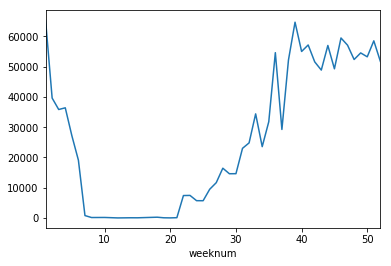

In [126]:
df_filtered['total_exits'].groupby(df_filtered['weeknum']).sum().plot()

In [127]:
df_filtered['default_rate']= df_filtered.defu / df_filtered.total_exits

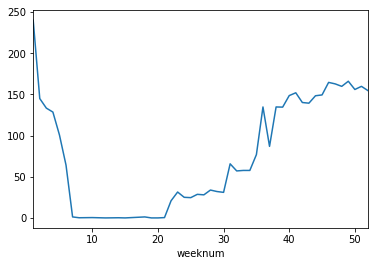

In [128]:
df_filtered['default_rate'].groupby(df_filtered['weeknum']).sum().plot()

In [129]:
df_filtered.head()

,index,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,...,dmed,tout,confirm,unique,siteid_lgt,state_num,lga_num,total_discharges,total_exits,default_rate
2,2,343bd73a-ac74-4835-b2e5-13590d61d335,2348081798563,Muhammad Ibrahim.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3313,2016-06-28 13:12:56,2016-06-28 13:15:33,26,Site,...,12,12,Yes,2348081798563 2016-06-28 13:12:56,4,33,3313,12010,60,0.2
3,3,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-06-28 13:09:28,2016-06-28 13:19:16,23,Site,...,10,10,Yes,2347032140235 2016-06-28 13:09:28,10,33,3308,10000,50,0.2
4,4,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 09:20:25,2016-07-10 09:33:28,22,Site,...,15,15,Yes,2347032140235 2016-07-10 09:20:25,10,33,3308,15010,75,0.2
5,5,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 09:48:19,2016-07-10 10:02:26,23,Site,...,10,10,Yes,2347032140235 2016-07-10 09:48:19,10,33,3308,10000,50,0.2
6,6,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 12:39:12,2016-07-10 12:51:23,24,Site,...,2,2,Yes,2347032140235 2016-07-10 12:39:12,10,33,3308,2010,10,0.2


In [130]:

df_filtered['year'] = df_filtered['last_seen'].map(lambda x: x.year)
df_filtered['last_seen_weeknum'] = df_filtered['last_seen'].map(lambda x: x.week)


In [131]:
df_filtered['last_seen_weeknum'] < df_filtered['weeknum']

# df['elderly'] = np.where(df['age']>=50, 'yes', 'no')
df_filtered['good_year'] = np.where(df_filtered['last_seen_weeknum'] < df_filtered['weeknum'], df_filtered['year'] - 1, df_filtered['year'])

In [132]:
sorted(df_filtered['last_seen_weeknum'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52]

In [134]:
df_filtered['last_seen'][0].week

KeyError: 0

In [135]:
df_filtered.sort_values(['year', 'weeknum'])

,index,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,...,unique,siteid_lgt,state_num,lga_num,total_discharges,total_exits,default_rate,year,last_seen_weeknum,good_year
1251,1243,af10e69b-7fb0-4206-916a-de303c86c336,2349032767693,Shafiu Nuhu.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3305110027,2016-06-29 12:21:33,2016-06-29 12:43:32,1,Site,...,2349032767693 2016-06-29 12:21:33,10,33,3305,8101214,40,0.2,2016,26,2016
1876,1871,f837aa15-e6d7-4027-976d-d4e35f77e4b1,2348035974626,John T Anusiem .,"Imam Supervision, Imam Supervision 2, Imam Sup...",3305110027,2016-06-30 13:40:44,2016-06-30 14:13:42,1,Site,...,2348035974626 2016-06-30 13:40:44,10,33,3305,16.010.012.014.0,80,0.2,2016,26,2016
1899,1893,4ac85087-57f6-4961-8981-47eee2acbde8,2348036754655,Christopher Chukwu.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3301210002,2016-06-30 13:40:19,2016-06-30 13:55:46,1,Site,...,2348036754655 2016-06-30 13:40:19,10,33,3301,14.010.012.014.0,70,0.2,2016,26,2016
1920,1914,dd5bd1f9-901e-4493-8b42-c52ea6430b3e,2348104653985,Halima Bello.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3317110023,2016-06-30 13:31:02,2016-06-30 13:41:28,1,Site,...,2348104653985 2016-06-30 13:31:02,10,33,3317,4121,20,0.2,2016,26,2016
2156,2150,30dcf3fb-2d54-4e1d-88f8-0b95d7a857ac,2348036394462,Sadiya Umar.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3316210012,2016-06-30 13:30:54,2016-06-30 13:41:59,1,Site,...,2348036394462 2016-06-30 13:30:54,10,33,3316,18.010.012.014.0,90,0.2,2016,26,2016
2335,2328,e56c6b93-7551-494f-9655-6928980179e8,2347033333861,Turu Umar.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308210004,2016-06-30 13:32:22,2016-06-30 13:41:31,1,Site,...,2347033333861 2016-06-30 13:32:22,10,33,3308,18.010.012.014.0,90,0.2,2016,26,2016
2388,2381,15fa089d-2828-4c66-8e2a-83fae21a90ec,2348067074074,Ani Samuel .,"Imam Supervision, Imam Supervision 2, Imam Sup...",3313110033,2016-06-30 13:31:03,2016-06-30 13:35:43,1,Site,...,2348067074074 2016-06-30 13:31:03,10,33,3313,16.010.012.014.0,80,0.2,2016,26,2016
2470,2463,ac27063d-ece3-48b7-97e2-4e3dca4f228e,2348132656366,Aliyu S Atiku.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308210004,2016-06-30 13:32:39,2016-06-30 13:42:20,1,Site,...,2348132656366 2016-06-30 13:32:39,10,33,3308,18.010.012.014.0,90,0.2,2016,26,2016
2529,2520,941df618-977b-4a8a-a23f-7bbeed172577,2348060257844,Endaline Ngozi Ezeri.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3316210012,2016-06-30 13:41:48,2016-06-30 13:45:26,1,Site,...,2348060257844 2016-06-30 13:41:48,10,33,3316,18.010.012.014.0,90,0.2,2016,26,2016
2801,2793,e89c5b10-6640-4d09-954c-c32e4ebdd058,2348167265977,Elisbath Mbonu.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3313110033,2016-06-30 13:34:12,2016-06-30 14:51:55,1,Site,...,2348167265977 2016-06-30 13:34:12,10,33,3313,14101214,70,0.2,2016,26,2016


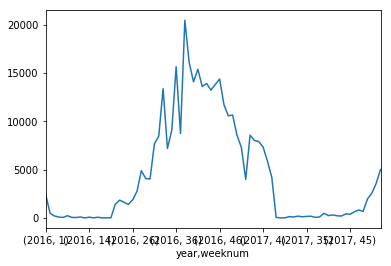

In [136]:
df_filtered.sort_values(['year', 'weeknum'])['amar'].groupby([df_filtered['year'], df_filtered['weeknum']]).sum().plot()

/home/robert/PycharmProjects/IMAM/ve/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


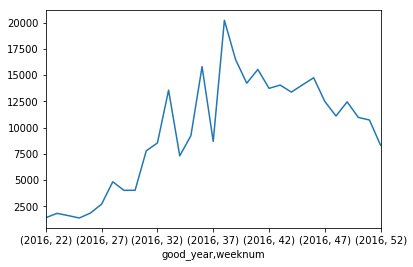

In [137]:
# [(df['date'] > '2013-01-01') & (df['date'] < '2013-02-01')]
df_filtered.sort_values(['good_year', 'weeknum'])[(df_filtered['good_year'] >= 2017) | ((df_filtered['good_year'] == 2016) & (df_filtered['weeknum'] >= 22))][(df_filtered['good_year'] < date.today().year) | ((df_filtered['good_year'] == date.today().year) & (df_filtered['weeknum'] <= date.today().isocalendar()[1]))][df_filtered['good_year'] == 2016]['amar'].groupby([df_filtered['good_year'], df_filtered['weeknum']]).sum().plot()
# df_filtered.sort_values(['good_year', 'weeknum'])['amar'][df_filtered['good_year'] <= 2016 & df_filtered['weeknum'] < 22].groupby([df_filtered['good_year'], df_filtered['weeknum']]).sum().plot()

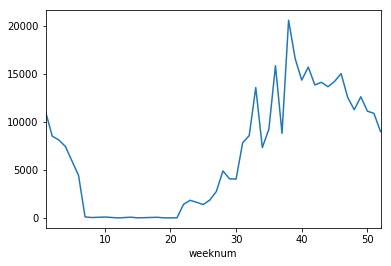

In [138]:
df_filtered.sort_values(['weeknum'])['amar'].groupby(df_filtered['weeknum']).sum().plot()

In [139]:
adm_by_week = df_filtered['amar'].groupby([df_filtered['year'], df_filtered['weeknum']]).sum()

In [140]:
adm_by_week

year  weeknum
2016  1           2419
      2            482
      3            206
      4             88
      5             53
      6            234
      7             53
      8             43
      10            98
      12             4
      14            79
      15            10
      18            70
      19             9
      20             9
      21            16
      22          1421
      23          1835
      24          1624
      25          1393
      26          1866
      27          2758
      28          4890
      29          4074
      30          4035
      31          7674
      32          8462
      33         13380
      34          7192
      35          9086
                 ...  
2017  2           8024
      3           7901
      4           7344
      5           5871
      6           4196
      7             55
      21             2
      30             4
      31           135
      32           100
      33           184
      34           1

In [150]:
adm_by_week.index.

AttributeError: 'MultiIndex' object has no attribute 'to_list'

In [145]:
[x for x in adm_by_week.index]

[(2016, 1),
 (2016, 2),
 (2016, 3),
 (2016, 4),
 (2016, 5),
 (2016, 6),
 (2016, 7),
 (2016, 8),
 (2016, 10),
 (2016, 12),
 (2016, 14),
 (2016, 15),
 (2016, 18),
 (2016, 19),
 (2016, 20),
 (2016, 21),
 (2016, 22),
 (2016, 23),
 (2016, 24),
 (2016, 25),
 (2016, 26),
 (2016, 27),
 (2016, 28),
 (2016, 29),
 (2016, 30),
 (2016, 31),
 (2016, 32),
 (2016, 33),
 (2016, 34),
 (2016, 35),
 (2016, 36),
 (2016, 37),
 (2016, 38),
 (2016, 39),
 (2016, 40),
 (2016, 41),
 (2016, 42),
 (2016, 43),
 (2016, 44),
 (2016, 45),
 (2016, 46),
 (2016, 47),
 (2016, 48),
 (2016, 49),
 (2016, 50),
 (2016, 51),
 (2016, 52),
 (2017, 1),
 (2017, 2),
 (2017, 3),
 (2017, 4),
 (2017, 5),
 (2017, 6),
 (2017, 7),
 (2017, 21),
 (2017, 30),
 (2017, 31),
 (2017, 32),
 (2017, 33),
 (2017, 34),
 (2017, 35),
 (2017, 36),
 (2017, 37),
 (2017, 38),
 (2017, 39),
 (2017, 40),
 (2017, 41),
 (2017, 42),
 (2017, 43),
 (2017, 44),
 (2017, 45),
 (2017, 46),
 (2017, 47),
 (2017, 48),
 (2017, 49),
 (2017, 50),
 (2017, 51),
 (2017, 52)]

In [146]:
zip(adm_by_week.index, adm_by_week.values.tolist())

[((2016, 1), 2419),
 ((2016, 2), 482),
 ((2016, 3), 206),
 ((2016, 4), 88),
 ((2016, 5), 53),
 ((2016, 6), 234),
 ((2016, 7), 53),
 ((2016, 8), 43),
 ((2016, 10), 98),
 ((2016, 12), 4),
 ((2016, 14), 79),
 ((2016, 15), 10),
 ((2016, 18), 70),
 ((2016, 19), 9),
 ((2016, 20), 9),
 ((2016, 21), 16),
 ((2016, 22), 1421),
 ((2016, 23), 1835),
 ((2016, 24), 1624),
 ((2016, 25), 1393),
 ((2016, 26), 1866),
 ((2016, 27), 2758),
 ((2016, 28), 4890),
 ((2016, 29), 4074),
 ((2016, 30), 4035),
 ((2016, 31), 7674),
 ((2016, 32), 8462),
 ((2016, 33), 13380),
 ((2016, 34), 7192),
 ((2016, 35), 9086),
 ((2016, 36), 15646),
 ((2016, 37), 8739),
 ((2016, 38), 20459),
 ((2016, 39), 16082),
 ((2016, 40), 14091),
 ((2016, 41), 15381),
 ((2016, 42), 13604),
 ((2016, 43), 13910),
 ((2016, 44), 13233),
 ((2016, 45), 13810),
 ((2016, 46), 14380),
 ((2016, 47), 11710),
 ((2016, 48), 10570),
 ((2016, 49), 10644),
 ((2016, 50), 8554),
 ((2016, 51), 7300),
 ((2016, 52), 3989),
 ((2017, 1), 8566),
 ((2017, 2), 8024

In [142]:
adm_by_week.values.tolist()

[2419,
 482,
 206,
 88,
 53,
 234,
 53,
 43,
 98,
 4,
 79,
 10,
 70,
 9,
 9,
 16,
 1421,
 1835,
 1624,
 1393,
 1866,
 2758,
 4890,
 4074,
 4035,
 7674,
 8462,
 13380,
 7192,
 9086,
 15646,
 8739,
 20459,
 16082,
 14091,
 15381,
 13604,
 13910,
 13233,
 13810,
 14380,
 11710,
 10570,
 10644,
 8554,
 7300,
 3989,
 8566,
 8024,
 7901,
 7344,
 5871,
 4196,
 55,
 2,
 4,
 135,
 100,
 184,
 122,
 161,
 178,
 61,
 99,
 484,
 244,
 308,
 225,
 195,
 412,
 385,
 632,
 826,
 683,
 1955,
 2555,
 3573,
 5001]